# Лабораторная работа №1. Регрессия

**Тема:** *Сравнение линейной регрессии, случайного леса (Random Forest Regressor), градиентного бустинга (XGBoost) на задаче регрессии.*

**Цели:**

- *Научиться строить, оптимизировать и оценивать регрессионные модели.*
- *Понять, как интерпретировать важность признаков (feature importance).*
- *Понять, как увеличивать кол-во признаков (feature tuning).*
- *Исследовать влияние преобразований признаков (фичей), регуляризации и гиперпараметров.*

**Условия:**

- *numpy, pandas, scikit-learn, XGBoost*
- *выбрать датасет для 1-ой и 2-ой лабораторной работы*

**Пункты:**

1. Подготовка данных + Feature Tuning
2. Создание метрик
3. Базовая модель линейной регрессии
4. Улучшение линейной регрессии
5. Случайный лес регрессор
6. Градиентный бустинг (XGBoost)
7. Feature Importance
8. Написание своих реализаций (классы)
9. Подведение итогов


## О команде (ЗАПОЛНИТЬ СВОИМИ ДАННЫМИ)

| Фамилия И.О.        | Группа | Роль в команде | Что делал                    |
|---------------------|--------|----------------|------------------------------|
| Бельский Г.Б.         | 307    | Solo way       | Все сам                      |

 Датасет: [student-habits](https://www.kaggle.com/datasets/jayaantanaath/student-habits-vs-academic-performance)

## Описание датасета (ЗАПОЛНИТЬ СВОИМИ ДАННЫМИ)

Это смоделированный набор данных, исследующий, как привычки образа жизни влияют на успеваемость студентов. В нем содержится 1000 синтетических записей студентов и более 15 характеристик, включая часы учебы, режим сна, использование социальных сетей, качество питания, психическое здоровье и оценки по итоговым экзаменам. Он идеально подходит для проектов машинного обучения, регрессионного анализа, кластеризации и визуализации данных. Создан на основе реалистичных шаблонов для образовательной практики.

Задумывались ли вы когда-нибудь, насколько просмотр Netflix, сон или прокрутка TikTok влияют на ваши оценки? 👀 Этот набор данных моделирует повседневные привычки 1000 студентов — от времени учебы до психического здоровья — и сравнивает их с итоговыми оценками по экзаменам. Это как подглядывать за своим средним баллом через призму образа жизни. Идеально подходит для разведочного анализа данных, практики машинного обучения или просто времяпрепровождения с данными под видом продуктивности.

---

### Таблица признаков

| №  | Признак                    | Тип данных             | Описание                                                                                          |
|----|----------------------------|------------------------|-------------------------------------------------------------------------------------------------|
| 1  | **student_id**             | integer                | Уникальный идентификатор студента.                                                              |
| 2  | **age**                    | integer                | Возраст студента в годах.                                                                        |
| 3  | **gender**                 | categorical (строка)   | Пол студента (например, male/female/other).                                                      |
| 4  | **study_hours_per_day**    | float                  | Среднее количество часов учебы в день.                                                           |
| 5  | **social_media_hours**     | float                  | Время, проводимое в социальных сетях (в часах в день).                                          |
| 6  | **netflix_hours**          | float                  | Время, проводимое за просмотром Netflix (в часах в день).                                       |
| 7  | **part_time_job**          | boolean (True/False)   | Наличие работы с частичной занятостью (да/нет).                                                  |
| 8  | **attendance_percentage**  | float                  | Процент посещаемости занятий студентом.                                                          |
| 9  | **sleep_hours**            | float                  | Количество часов сна в сутки.                                                                     |
| 10 | **diet_quality**           | categorical (строка)   | Качество питания (например, good/average/poor).                                                  |
| 11 | **exercise_frequency**     | integer (число в неделю)| Частота физических упражнений (раз в неделю).                                                    |
| 12 | **parental_education_level** | categorical (строка) | Уровень образования родителей (например, high school/college/graduate).                           |
| 13 | **internet_quality**       | categorical (строка)   | Качество интернет-соединения (например, poor/average/good).                                      |
| 14 | **mental_health_rating**   | float (1–10)           | Оценка психического здоровья студента по шкале от 1 до 10.                                      |
| 15 | **extracurricular_participation** | boolean (True/False) | Участие в внеклассных мероприятиях (да/нет).                                                   |
| 16 | **exam_score**             | float (0–100)          | Оценка по итоговому экзамену (целевой признак).                                                  |



## 0. Глобальная настройка проекта


In [248]:
RND_SEED = 21
USE_AUTO_POLY = True

## 1. Подготовка данных + Feature Tuning

### 1.1. Загрузка датасета

Подключим `Google Drive` и загрузим наш датасет используя `Pandas.DataFrame`

Подключение к гугл диску

Загрузка датасета `pd.read_csv(path_to_dataset: str)`

In [249]:
import pandas as pd
import numpy as np
file_path = "D:\ML_labs\laba1\student_habits_performance.csv"
df = pd.read_csv(file_path)
df.drop(columns=["study_hours_per_day"], axis=1, inplace=True)

Получение статистки по датасету, необходимую для анализа. Подумать что можно сделать и какие выводы нужны.

Посмотрим первые три строки датасета `df.head(n: int)`

In [250]:
df.head(3)

,student_id,age,gender,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3


У нас тут имеется ненужный атрибут `ID`. Можем его удалить.

In [251]:
if 'student_id' in df.columns:
    df = df.drop(columns=['student_id'])

In [252]:
df.head(3)

,age,gender,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,23,Female,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,20,Female,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,21,Male,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3


Заменим данные в строковом виде на числовые для удобства их обработки

In [253]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for column in df.columns:
    if df[column].dtype == object:
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le

print(df)

     age  gender  social_media_hours  netflix_hours  part_time_job  \
0     23       0                 1.2            1.1              0   
1     20       0                 2.8            2.3              0   
2     21       1                 3.1            1.3              0   
3     23       0                 3.9            1.0              0   
4     19       0                 4.4            0.5              0   
..   ...     ...                 ...            ...            ...   
995   21       0                 0.5            1.6              0   
996   17       0                 1.0            2.4              1   
997   20       1                 2.6            1.3              0   
998   24       1                 4.1            1.1              1   
999   19       0                 2.9            1.9              0   

     attendance_percentage  sleep_hours  diet_quality  exercise_frequency  \
0                     85.0          8.0             0                   6   
1    

### 1.2. Сбор основной информации

Получение общей информации `df.info()`

In [254]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            1000 non-null   int64  
 1   gender                         1000 non-null   int32  
 2   social_media_hours             1000 non-null   float64
 3   netflix_hours                  1000 non-null   float64
 4   part_time_job                  1000 non-null   int32  
 5   attendance_percentage          1000 non-null   float64
 6   sleep_hours                    1000 non-null   float64
 7   diet_quality                   1000 non-null   int32  
 8   exercise_frequency             1000 non-null   int64  
 9   parental_education_level       1000 non-null   int32  
 10  internet_quality               1000 non-null   int32  
 11  mental_health_rating           1000 non-null   int64  
 12  extracurricular_participation  1000 non-null   in

Получение всей статистики `df.describe()`

In [255]:
df.describe()

,age,gender,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
count,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.4980,0.561000,2.505500,1.819700,0.215000,84.131700,6.470100,0.7480,3.042000,0.999000,0.771000,5.438000,0.318000,69.601500
std,2.3081,0.574987,1.172422,1.075118,0.411028,9.399246,1.226377,0.7477,2.025423,0.939085,0.707856,2.847501,0.465932,16.888564
min,17.0000,0.000000,0.000000,0.000000,0.000000,56.000000,3.200000,0.0000,0.000000,0.000000,0.000000,1.000000,0.000000,18.400000
25%,18.7500,0.000000,1.700000,1.000000,0.000000,78.000000,5.600000,0.0000,1.000000,0.000000,0.000000,3.000000,0.000000,58.475000
50%,20.0000,1.000000,2.500000,1.800000,0.000000,84.400000,6.500000,1.0000,3.000000,1.000000,1.000000,5.000000,0.000000,70.500000
75%,23.0000,1.000000,3.300000,2.525000,0.000000,91.025000,7.300000,1.0000,5.000000,2.000000,1.000000,8.000000,1.000000,81.325000
max,24.0000,2.000000,7.200000,5.400000,1.000000,100.000000,10.000000,2.0000,6.000000,3.000000,2.000000,10.000000,1.000000,100.000000


**Вывод:**

1. Общая информация

- **Размер датасета**: 1000 наблюдений (студентов).
- **Целевая переменная (exam_score)**: принимает значения от **18.4 до 100**, со средним ≈ **69.6**.

   -> Значит, в основном студенты получают **средние оценки** (65–75 баллов).
   
   -> Отличников (близкие к 100) и слабых студентов (ниже 20) мало → **ДИСБАЛАНС КЛАССОВ**.

2. Учебная активность и досуг

- **study_hours_per_day** (часы учебы в день):

  - Среднее около 3.55 часа, стандартное отклонение 1.47.
  - Большинство студентов учатся от 2.6 до 4.5 часов (межквартильный размах).
  - Есть отдельные студенты с минимальным временем (0 часов) и до 8.3 часов.

- **social_media_hours** (часы в соцсетях):

  - Среднее около 2.5 часа, разброс от 0 до 7.2 часов.
  - Активность в соцсетях варьируется широко, что может влиять на успеваемость.

- **netflix_hours** (часы просмотра Netflix):

  - Среднее около 1.8 часа.
  - Значения от 0 до 5.4 часа, медиана близка к 1.8 часам.

3. Посещаемость и здоровье

- **attendance_percentage** (процент посещаемости):

  - Высокий средний показатель: ≈ 84%.
  - Минимум 56%, максимум 100%, что говорит о хорошем посещении большинства студентов.

- **sleep_hours** (часы сна):

  - Среднее около 6.47 часа.
  - Минимум 3.2 часа — это слишком мало, максимум 10 часов.
  - Оптимальное количество сна для студентов рекомендуется выше 7, многие недосыпают.

- **exercise_frequency** (частота занятий спортом):

  - Среднее ≈ 3 раза в неделю.
  - Разброс от 0 до 6.

4. Психическое здоровье и другие факторы

- **mental_health_rating** (оценка психического здоровья):

  - Среднее ≈ 5.44 по шкале от 1 до 10.
  - Минимум 1, максимум 10, что свидетельствует о сильной вариативности.

- **exam_score** (оценка по экзаменам):

  - Среднее 69.6 балла.
  - Минимум 18.4, максимум 100.
  - Распределение указывает на преобладание средних оценок с некоторыми выбросами в обе стороны.



Проверка на пропуски данных `df.isnull().sum()`

In [256]:
print(df.isnull().sum())

age                              0
gender                           0
social_media_hours               0
netflix_hours                    0
part_time_job                    0
attendance_percentage            0
sleep_hours                      0
diet_quality                     0
exercise_frequency               0
parental_education_level         0
internet_quality                 0
mental_health_rating             0
extracurricular_participation    0
exam_score                       0
dtype: int64


In [257]:
df['parental_education_level'] = df['parental_education_level'].fillna(df['parental_education_level'].median())
print(df.isnull().sum())

age                              0
gender                           0
social_media_hours               0
netflix_hours                    0
part_time_job                    0
attendance_percentage            0
sleep_hours                      0
diet_quality                     0
exercise_frequency               0
parental_education_level         0
internet_quality                 0
mental_health_rating             0
extracurricular_participation    0
exam_score                       0
dtype: int64


**Вывод:** в датасете были пропуски! Заполнили их средним значением

Посмотрим на корреляцию данных.

***Определение 1: Корреляция данных — это статистическая мера, показывающая, насколько и в каком направлении связаны между собой две переменные.***

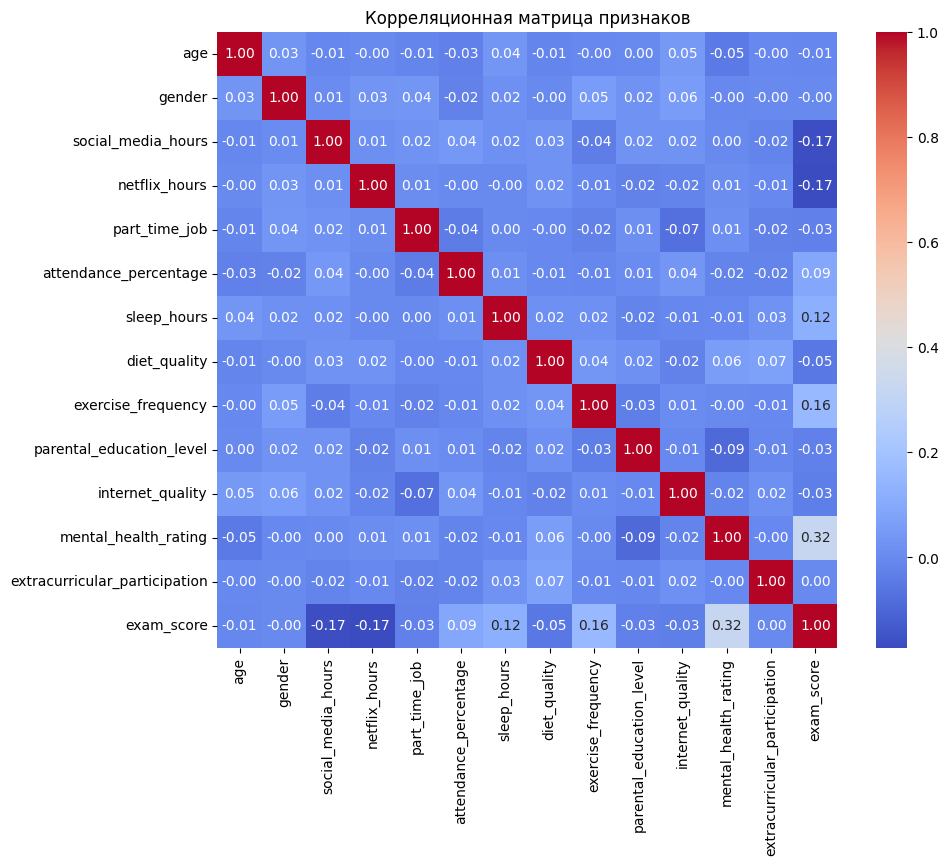

In [258]:
import seaborn as sns
import matplotlib.pyplot as plt

def draw_corr_matrix(df):
    plt.figure(figsize=(10,8))
    sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("Корреляционная матрица признаков")
    plt.show()

draw_corr_matrix(df)

Самая высокая положительная корреляция с итоговой оценкой (exam_score) у признака study_hours_per_day (0.83): чем больше студент занимается, тем выше результат экзамена.

**!!! ВАЖНО !!!**

**ЕСЛИ МЫ СОБИРАЕМСЯУЧИТЬ ЛИНЕЙНУЮ МОДЕЛЬ, И ДАННЫЕ КОРРЕЛИРУЮТ (МУЛЬТИКОЛЛИНЕАРНОСТЬ), ТО НУЖНО ЛИБО УДАЛИТЬ ОДИН ИЗ ПРИЗНАКОВ, ЛИБО СОЗДАТЬ НОВЫЙ ПРИЗНАК НА ИХ ОСНОВЕ И ИХ УДАЛИТЬ**

### 1.3. Подготовка датасета под разные задачи

Cравнение подготовки

| Модель                  | Масштабирование | Корреляция критична | Выбросы критичны | Feature Engineering рекомендуем                  |
| ----------------------- | --------------- | ------------------- | ---------------- | ------------------------------------------------ |
| Линейная регрессия      | Да              | Да                  | Да               | Полиномы, логарифмы, отношения                   |
| Random Forest Regressor | Нет             | Нет                 | Нет              | Соотношения, интеракции                          |
| XGBoost Regressor       | Нет             | Нет                 | Нет              | Соотношения, интеракции, логарифмы (опционально) |

#### 1.3.1 Линейная регрессия (Linear Regression / Ridge / Lasso)

**Особенности модели:**

- Чувствительна к масштабу признаков и мультиколлинеарности.
- Чувствительна к выбросам.

Сделаем копию датасета

In [259]:
df_linear = df.copy()

Рассмотрим скошенность данных

***Определение 2: Скошенность – это мера асимметрии распределения признака***

* **Скошенность > 0 (положительная):** Хвост распределения тянется вправо (большие значения встречаются реже).

* **Скошенность < 0 (отрицательная):** Хвост распределения тянется влево (малые значения редки).

* **Скошенность ≈ 0:** Практически нормальное распределение (симметричное).


In [260]:
skew_values = df_linear.skew()
skew_values_hard = skew_values[abs(skew_values) > 0.5]  # выделяем сильноскошенные данные
print(skew_values_hard)  # сильно скошенные

skew_columns_hard = list(skew_values_hard.index)
print(f'Скошенные столбцы {skew_columns_hard}')

part_time_job                    1.389546
parental_education_level         0.663264
extracurricular_participation    0.782795
dtype: float64
Скошенные столбцы ['part_time_job', 'parental_education_level', 'extracurricular_participation']


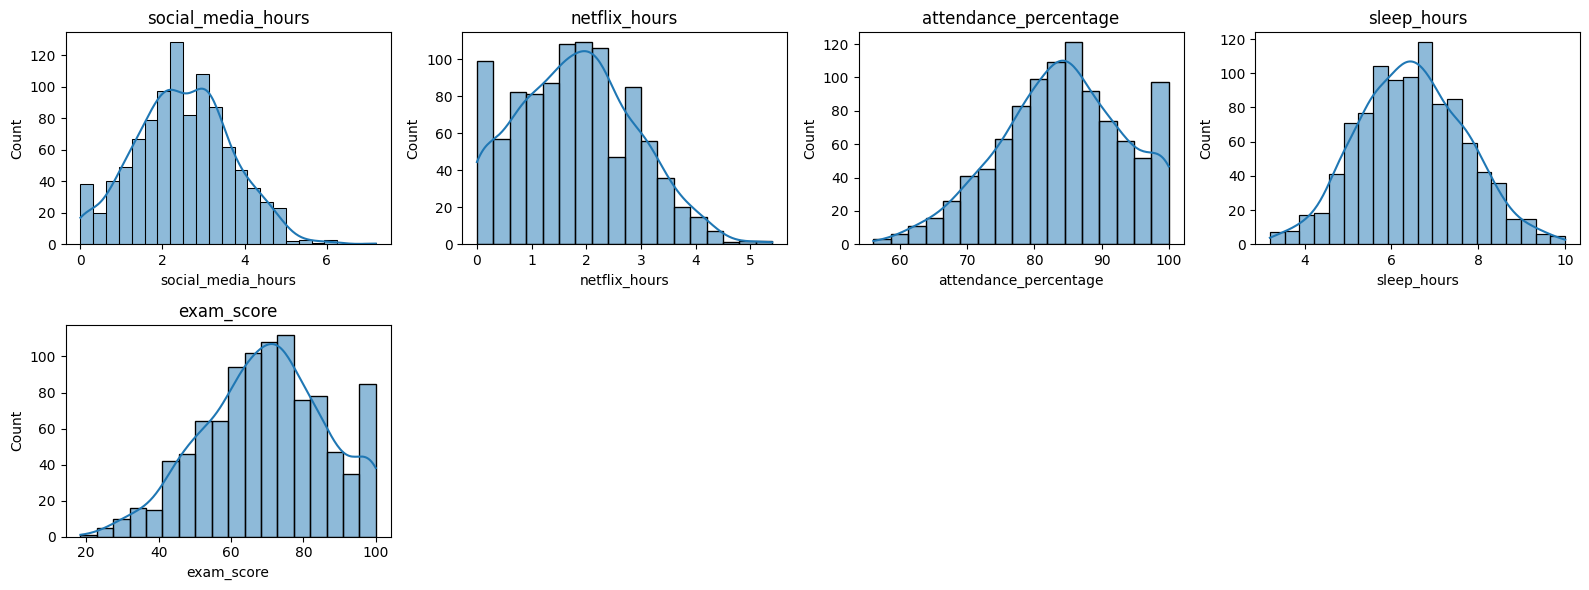

In [261]:
import math

def draw_skew(df: pd.DataFrame, n_cols=4):
    float_cols = df.select_dtypes(include='float').columns
    n_rows = math.ceil(len(float_cols) / n_cols)

    fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols*4, n_rows*3))
    axs = axs.flatten()  # делаем одномерным массивом для удобства

    for i, col in enumerate(float_cols):
        sns.histplot(df[col], kde=True, ax=axs[i])
        axs[i].set_title(f'{col}')

    # Если графиков меньше, чем ячеек в сетке, скрываем лишние
    for j in range(i+1, len(axs)):
        axs[j].set_visible(False)

    plt.tight_layout()
    plt.show()


draw_skew(df_linear)

Можно уменьшить влияние скошенности с помошью:

- Логарифмирование (Уменьшаем положительный хвост)
- Квадратный корень  (сглаживаем умеренные хвосты)
- `Box-Cox` или `Yeo-Johnson` трансформации (более гибкие)

Мы же просто прологарифмируем :)

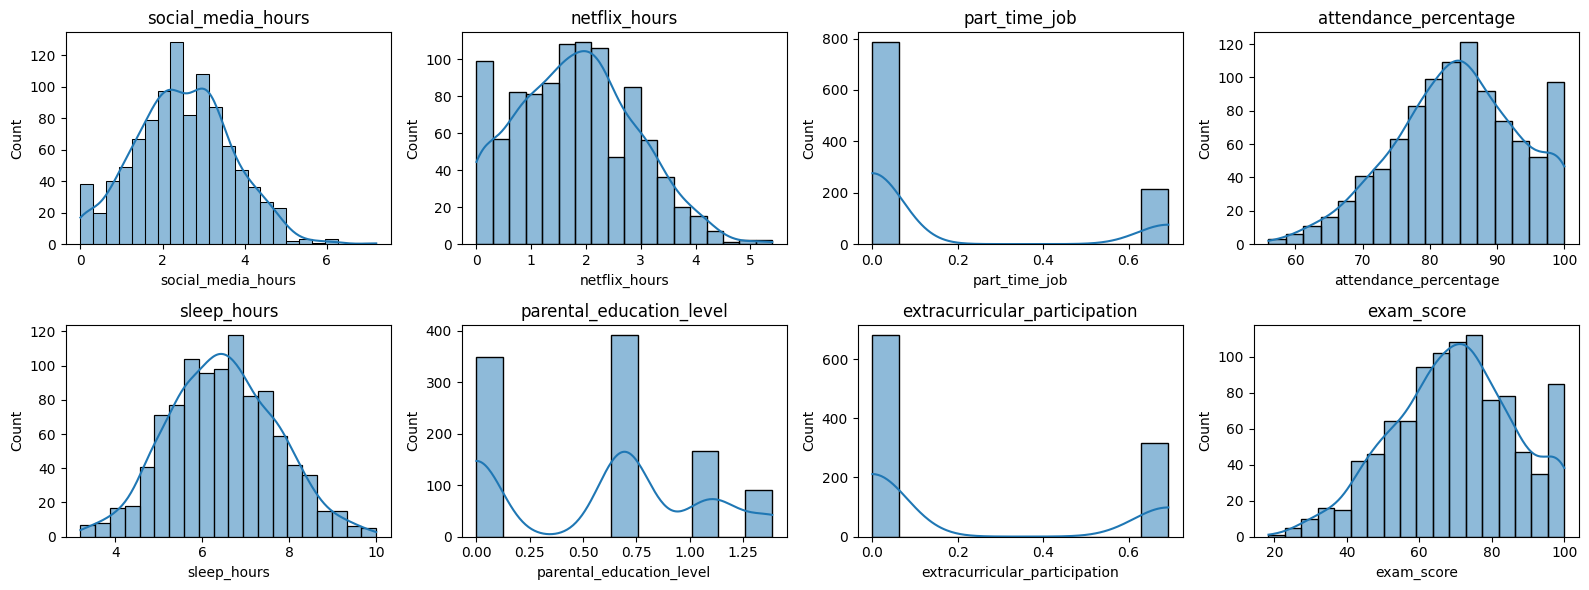

In [262]:
def prepare_skew(df: pd.DataFrame, columns: list[str]):
    for col in columns:
        df[col] = np.log1p(df[col])
    return df

df_linear = prepare_skew(df = df_linear, columns = skew_columns_hard)

draw_skew(df_linear)

Сделаем `Feature Engineering` (4 штуки)

Определение 3. Feature Engineering - процесс добавления новых зависимостей признаков.

   * `study_hours_squared` — нелинейное влияние часов учебы на оценку.
   * `study_sleep_interaction` — Взаимодействие учебы и сна.
   * `social_study_ratio` — Соотношение соцсетей и учебы.
   * `exercise_mental_interaction` — Интерактивный признак: спорт * психическое здоровье.



In [263]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# --- Feature Engineering вручную (4 новых признака) ---

# 1. Квадрат времени на учебу (нелинейный эффект)
# df['study_hours_squared'] = df['study_hours_per_day'] ** 2

# 2. Взаимодействие учебы и сна
# df['study_sleep_interaction'] = df['study_hours_per_day'] * df['sleep_hours']

# 3. Соотношение соцсетей и учебы
# df['social_study_ratio'] = df['social_media_hours'] / (df['study_hours_per_day'] + 1e-5)

# 4. Интерактивный признак: спорт * психическое здоровье
df['exercise_mental_interaction'] = df['exercise_frequency'] * df['mental_health_rating']


# Разделяем данные на train и test (например, 80/20)
X = df.drop(columns=['exam_score'])
y = df['exam_score']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# --- Стандартизация признаков ---

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # стандартизация только по train
X_test_scaled = scaler.transform(X_test)        # применяем параметры train к test

# Если нужно — превращаем обратно в DataFrame:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)


In [264]:
if not USE_AUTO_POLY:
    draw_corr_matrix(df_linear)
else:
    print(df_linear.corr())

                                    age    gender  social_media_hours  \
age                            1.000000  0.032902           -0.009151   
gender                         0.032902  1.000000            0.006555   
social_media_hours            -0.009151  0.006555            1.000000   
netflix_hours                 -0.001174  0.033111            0.011477   
part_time_job                 -0.011680  0.035515            0.021224   
attendance_percentage         -0.026055 -0.021779            0.040479   
sleep_hours                    0.037482  0.018843            0.018236   
diet_quality                  -0.011893 -0.001462            0.028760   
exercise_frequency            -0.003836  0.052808           -0.037319   
parental_education_level      -0.011012  0.035623            0.028744   
internet_quality               0.047202  0.055261            0.021541   
mental_health_rating          -0.045101 -0.003496            0.001496   
extracurricular_participation -0.004993 -0.001487  

In [265]:
if not USE_AUTO_POLY:
    draw_skew(df_linear, 5)

Разделение датасета на признаки и целевую переменную

In [266]:
from sklearn.model_selection import train_test_split

X_linear = df_linear.drop(columns=['exam_score'])
y_linear = df_linear['exam_score']

# Разделение выборки на test/train (20/80)
X_train_linear, X_test_linear, y_train_linear, y_test_linear = train_test_split(
    X_linear, y_linear, test_size=0.2, random_state=RND_SEED
)

Данные для обучения модели нужно стандартизировать

***Определение 4: Стандартизация признаков — это метод преобразования числовых признаков так, чтобы они имели среднее значение 0 и стандартное отклонение 1. Это важный шаг в подготовке данных для моделей, чувствительных к масштабу признаков, например линейной регрессии, логистической регрессии, SVM, KNN.***

**Как это работает**

Для каждого признака $x$ вычисляется:

$$
x_\text{scaled} = \frac{x - \mu}{\sigma}
$$

где:

* $\mu$ — среднее значение признака в обучающей выборке,
* $\sigma$ — стандартное отклонение признака.

После стандартизации:

* Среднее значение нового признака ≈ 0
* Стандартное отклонение ≈ 1


In [267]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_linear_scaled = scaler.fit_transform(X_train_linear)  # вычисляет среднее и стандартное отклонение (только на train)
X_test_linear_scaled = scaler.transform(X_test_linear)  # применяет эти параметры к любым данным (train, test, новые данные)

#### 1.3.2 Random Forest Regressor

**Особенности модели:**

* Не чувствительна к масштабу признаков.
* Может обрабатывать сильные корреляции между признаками.
* Может использовать категориальные признаки, если они закодированы как числовые.


Сделаем копию датасета

In [268]:
df_forest = df.copy()

Разделение выборки

In [269]:
X_forest = df_forest.drop(columns=['exam_score'])
y_forest = df_forest['exam_score']

X_train_forest, X_test_forest, y_train_forest, y_test_forest = train_test_split(
    X_forest, y_forest, test_size=0.2, random_state=RND_SEED
)

#### 1.3.3 XGBoost

**Особенности модели:**

* Градиентный бустинг деревьев.
* Не чувствителен к масштабу.
* Может обрабатывать коррелированные признаки, но слишком много слабых признаков может замедлить обучение.

Сделаем копию датасета

In [270]:
df_xgboost = df.copy()

Feature engineering

In [271]:
# Отношения
# df_xgboost['free_to_total_study_ratio'] = df_xgboost['study_hours_per_day'] / (df_xgboost['social_media_hours'] + 1e-6)
# df_xgboost['netflix_to_study_ratio'] = df_xgboost['netflix_hours'] / (df_xgboost['study_hours_per_day'] + 1e-6)

# Интеракции
# df_xgboost['study_sleep_interaction'] = df_xgboost['study_hours_per_day'] * df_xgboost['sleep_hours']

# Логарифмы (уменьшаем эффект длинного хвоста)
df_xgboost['log_social_media_hours'] = np.log1p(df_xgboost['social_media_hours'])
df_xgboost['log_netflix_hours'] = np.log1p(df_xgboost['netflix_hours'])

Разделение выборки

In [272]:
X_xgboost = df_xgboost.drop(columns=['exam_score'])
y_xgboost = df_xgboost['exam_score']

X_train_xgboost, X_test_xgboost, y_train_xgboost, y_test_xgboost = train_test_split(
    X_xgboost, y_xgboost, test_size=0.2, random_state=RND_SEED
)

## 2. Создание метрик

1. **MSE (Mean Squared Error)** – средняя квадратичная ошибка:

$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

* Чем меньше, тем лучше.
* Чувствительна к выбросам (квадрат ошибки усиливает влияние больших отклонений).

2. **RMSE (Root Mean Squared Error)** – корень из MSE:

$$
\text{RMSE} = \sqrt{\text{MSE}}
$$

* В тех же единицах, что и целевая переменная.
* Легче интерпретировать.

3. **MAE (Mean Absolute Error)** – средняя абсолютная ошибка:

$$
\text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|
$$

* Менее чувствительна к выбросам, показывает «среднюю ошибку» в исходных единицах.

4. **R² (коэффициент детерминации)**:

$$
R^2 = 1 - \frac{\sum (y_i - \hat{y}_i)^2}{\sum (y_i - \bar{y})^2}
$$

* 1 → идеальное предсказание, 0 → модель не лучше среднего, <0 → хуже среднего.

**Как интерпретировать**

| Метрика | Как читать                    | Что значит для анализа                                                   |
| ------- | ----------------------------- | ------------------------------------------------------------------------ |
| MSE     | Чем меньше, тем точнее        | Показывает среднюю квадратичную ошибку. Выбросы сильно влияют.           |
| RMSE    | В тех же единицах, что и цель | Удобно для прямой интерпретации ошибок.                                  |
| MAE     | Средняя абсолютная ошибка     | Устойчивее к выбросам, показывает среднюю фактическую ошибку.            |
| R²      | 0–1 (или <0)                  | 1 — идеальное совпадение, 0 — предсказывает среднее, <0 — хуже среднего. |

**Пример анализа:**

* Если RMSE и MAE сильно отличаются → есть выбросы.
* Если R² близок к 1 → модель хорошо объясняет вариацию данных.
* Можно сравнивать модели: линейная, RF, XGBoost. Та, у которой меньше RMSE/MAE и выше R² — более точная.


In [273]:
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def rmse(y_true, y_pred):
    return np.sqrt(mse(y_true, y_pred))

def mae(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

def r2(y_true, y_pred):
    return 1 - (np.sum((y_true - y_pred) ** 2) / np.sum((y_true - np.mean(y_true)) ** 2))

def get_metrics(y_true, y_pred):
    return {
        'MSE': mse(y_true, y_pred),
        'RMSE': rmse(y_true, y_pred),
        'MAE': mae(y_true, y_pred),
        'R2': r2(y_true, y_pred)
    }


Прежде чем начнем обучать, создадим `DataFrame` для снятия метрик

In [274]:
# дописать
metrics_df = pd.DataFrame(columns=['Model', 'MSE', 'RMSE', 'MAE', 'R2'])

## 3. Базовая модель линейной регрессии (аналитическое решение)

In [275]:
# Создание линейной модели
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [276]:
# Обучение
lr.fit(X_train_linear_scaled, y_train_linear)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [277]:
# Прогонка и метрики
y_pred = lr.predict(X_test_linear_scaled)
lr_metrics = get_metrics(y_test_linear, y_pred)
lr_metrics
metrics_df['lr_metrcis'] = lr_metrics

## 4. Улучшенная версия линейной регрессии

In [278]:
from sklearn.linear_model import SGDRegressor

### 4.1. Градиентный спуск (симуляция)

In [279]:
# Создание линейной модели градиентного спуска
lr_gd = SGDRegressor(
    max_iter=2000,               # максимум итераций
    tol=1e-6,                    # остановка, когда улучшение < tol
    learning_rate='constant',  # тип изменения шага
    eta0=0.0001,                   # стартовый шаг
    penalty='l2',                # регуляризация L2 (Ridge)
    shuffle=False,               # важный момент: не перемешиваем данные, чтобы был настоящий GD
    random_state=RND_SEED
)

In [280]:
# Обучение
lr_gd.fit(X_train_linear_scaled, y_train_linear)

,loss,'squared_error'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,2000
,tol,1e-06
,shuffle,False
,verbose,0
,epsilon,0.1
,random_state,21


In [281]:
# Прогонка и метрики
y_pred = lr_gd.predict(X_test_linear_scaled)
lr_gd_metrics = get_metrics(y_test_linear, y_pred)
lr_gd_metrics
metrics_df['lr_gd_metrics'] = lr_gd_metrics

### 4.2. Стохастический градиентный спуск

In [282]:
# Инициализация модели
lr_sgd = SGDRegressor(
    max_iter=2000,                # максимум итераций
    tol=1e-6,                     # остановка, когда улучшение < tol
    learning_rate='invscaling',   # тип изменения шага
    eta0=0.01,                    # стартовый шаг
    penalty='l1',                 # регуляризация L2 (Ridge)
    random_state=RND_SEED
)

In [283]:
lr_sgd = SGDRegressor(
    max_iter=2000,                # максимум итераций
    tol=1e-6,                     # остановка, когда улучшение < tol
    learning_rate='invscaling',   # тип изменения шага
    eta0=0.001,                    # стартовый шаг
    penalty='l1',                 # регуляризация L2 (Ridge)
    random_state=RND_SEED
)

In [284]:
# Обучение
lr_sgd.fit(X_train_linear_scaled, y_train_linear)

,loss,'squared_error'
,penalty,'l1'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,2000
,tol,1e-06
,shuffle,True
,verbose,0
,epsilon,0.1
,random_state,21


In [285]:
# Прогонка и метрики
y_pred = lr_sgd.predict(X_test_linear_scaled)
lr_sgd_metrics = get_metrics(y_test_linear, y_pred)
lr_sgd_metrics
metrics_df['lr_sgd_metrics'] = lr_sgd_metrics

### 4.3. Линейная модель с регуляризацией Rigde (L2)

In [286]:
# Инициализация модели
from sklearn.linear_model import Ridge
lr_ridge = Ridge(alpha=1.0)

In [287]:
# Обучение
lr_ridge.fit(X_train_linear_scaled, y_train_linear)

,alpha,1.0
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [288]:
# Прогонка и метрики
y_pred = lr_ridge.predict(X_test_linear_scaled)
lr_ridge_metrics = get_metrics(y_test_linear, y_pred)
lr_ridge_metrics
metrics_df['lr_ridge_metrics'] = lr_ridge_metrics

### 4.3. Линейная модель с регуляризацией Lasso (L1)

In [289]:
# Инициализация модели
from sklearn.linear_model import Lasso
lr_lasso = Lasso(alpha=0.01)

In [290]:
# Обучение
lr_lasso.fit(X_train_linear_scaled, y_train_linear)

,alpha,0.01
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,1000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [291]:
# Прогонка и метрики
y_pred = lr_lasso.predict(X_test_linear_scaled)
lr_lasso_metrics = get_metrics(y_test_linear, y_pred)
lr_lasso_metrics
metrics_df['lr_lasso_metrics'] = lr_lasso_metrics

### 4.4. Линейная модель с регуляризацией ElasticNet (комбинация L1+L2)

In [292]:
# Инициализация модели
from sklearn.linear_model import ElasticNet
lr_enet = ElasticNet(alpha=0.01, l1_ratio=0.5)

In [293]:
# Обучение
lr_enet.fit(X_train_linear_scaled, y_train_linear)

,alpha,0.01
,l1_ratio,0.5
,fit_intercept,True
,precompute,False
,max_iter,1000
,copy_X,True
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [294]:
# Прогонка и метрики
y_pred = lr_enet.predict(X_test_linear_scaled)
lr_enet_metrics = get_metrics(y_test_linear, y_pred)
lr_enet_metrics
metrics_df['lr_enet_metrics'] = lr_enet_metrics

## 4. Случайный лес регрессор

In [295]:
# Инициализация модели
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(
    n_estimators=200,      # количество деревьев
    max_depth=None,        # глубина деревьев
    random_state=RND_SEED,
    n_jobs=-1              # использовать все ядра процессора
)

In [296]:
# Обучение
rf.fit(X_train_forest, y_train_forest)

,n_estimators,200
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [297]:
# Прогонка и метрики
y_pred = rf.predict(X_test_forest)
rf_metrics = get_metrics(y_test_forest, y_pred)
rf_metrics
metrics_df['rf_metrics'] = rf_metrics

## 5. Градиентный бустинг (XGBoost)

In [298]:
# Инициализация модели
import xgboost
xgb = xgboost.XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=RND_SEED
)

In [299]:
# Обучение
xgb.fit(X_train_xgboost, y_train_xgboost)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [300]:
# Прогонка и метрики
y_pred = xgb.predict(X_test_xgboost)
xgb_metrics = get_metrics(y_test_xgboost, y_pred)
xgb_metrics
metrics_df['xgb_metrics'] = xgb_metrics

## 5. Feature Importance

### 5.1 Linear Regression


В **линейных моделях** (LinearRegression, Ridge, Lasso) **feature importance** — это не что иное, как **коэффициенты модели (`coef_`)**.

Но есть нюансы:

* Коэффициенты сами по себе могут быть несопоставимы по масштабу признаков.
* Поэтому мы правильно сделали **стандартизацию (StandardScaler)** → теперь коэффициенты отражают вклад признаков.
* Знак коэффициента (+ / -) показывает направление влияния:

  * `+` → признак увеличивает предсказание качества вина,
  * `-` → уменьшает.


C:\Users\5417011\AppData\Local\Temp\ipykernel_7284\1675465040.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


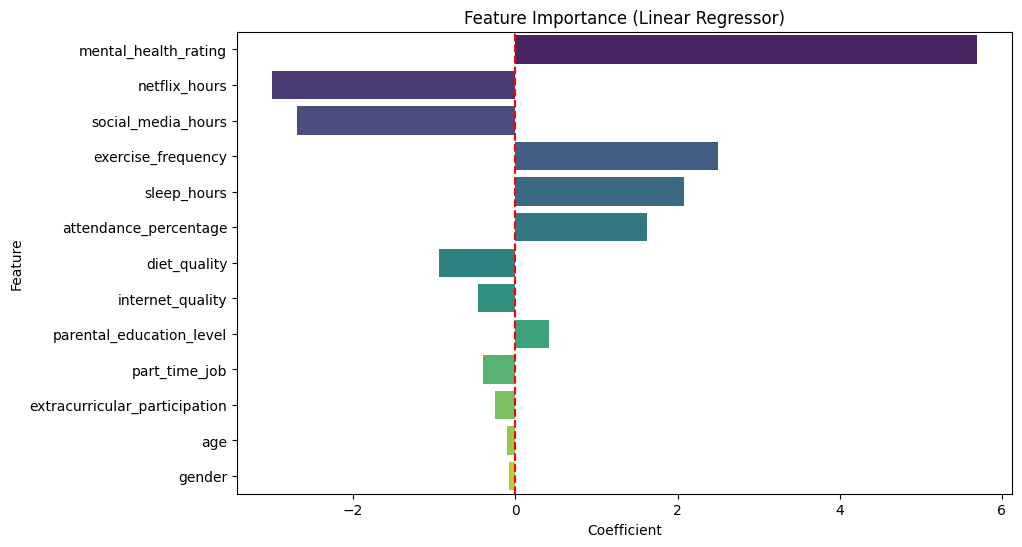

In [301]:
importance = pd.DataFrame({
    'Feature': X_train_linear.columns,
    'Coefficient': lr.coef_
}).sort_values(by='Coefficient', key=abs, ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(
    x='Coefficient',
    y='Feature',
    data=importance,
    palette='viridis'
)
plt.axvline(0, color='red', linestyle='--')
plt.title('Feature Importance (Linear Regressor)')
plt.show()

### 5.2 Linear Regression (GD)


C:\Users\5417011\AppData\Local\Temp\ipykernel_7284\1425956437.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


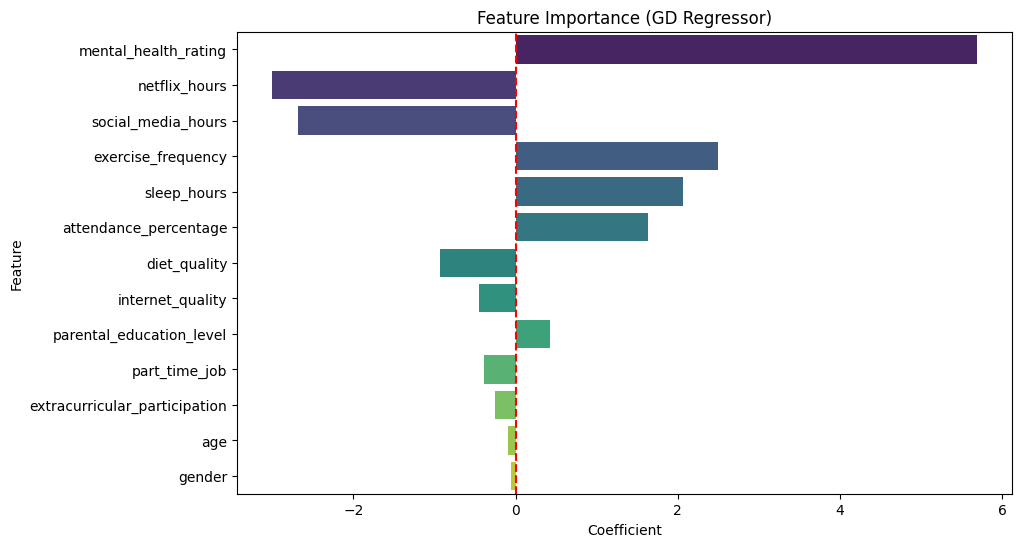

In [302]:
importance = pd.DataFrame({
    'Feature': X_train_linear.columns,
    'Coefficient': lr_gd.coef_
}).sort_values(by='Coefficient', key=abs, ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(
    x='Coefficient',
    y='Feature',
    data=importance,
    palette='viridis'
)
plt.axvline(0, color='red', linestyle='--')
plt.title('Feature Importance (GD Regressor)')
plt.show()

### 5.3 Linear Regression (SGD)


C:\Users\5417011\AppData\Local\Temp\ipykernel_7284\1165310945.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


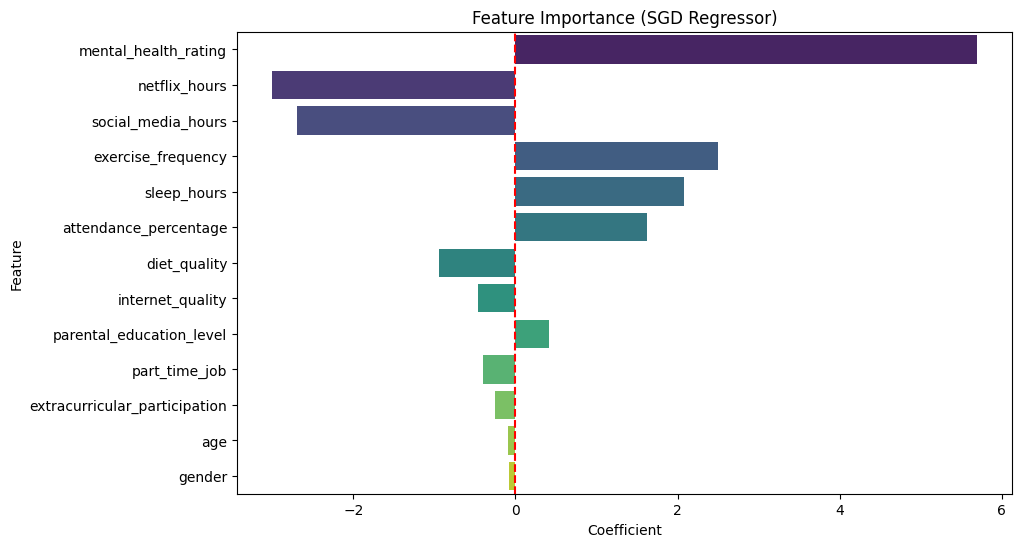

In [303]:
importance = pd.DataFrame({
    'Feature': X_train_linear.columns,
    'Coefficient': lr_sgd.coef_
}).sort_values(by='Coefficient', key=abs, ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(
    x='Coefficient',
    y='Feature',
    data=importance,
    palette='viridis'
)
plt.axvline(0, color='red', linestyle='--')
plt.title('Feature Importance (SGD Regressor)')
plt.show()

### 5.4 Linear Regression (Rigde)


C:\Users\5417011\AppData\Local\Temp\ipykernel_7284\647660009.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


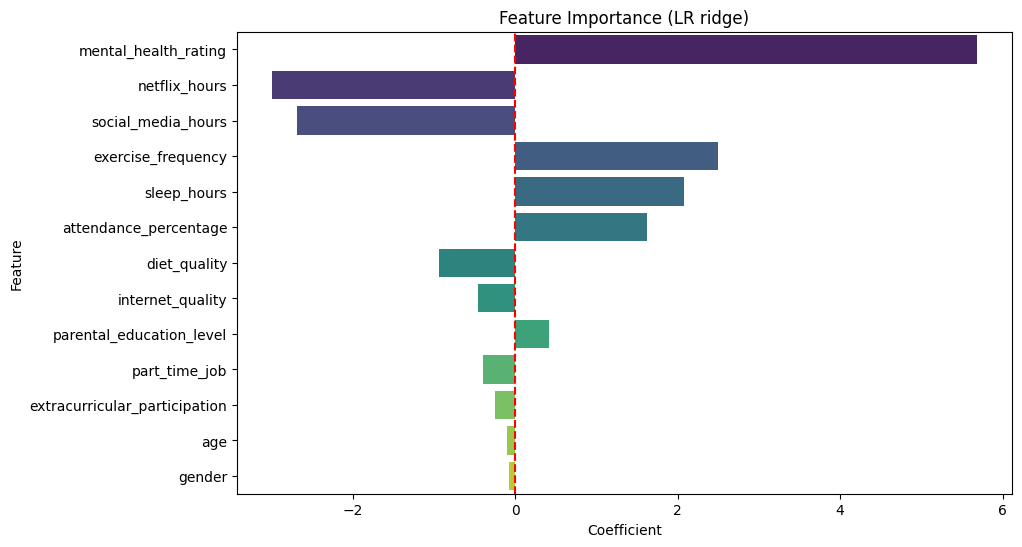

In [304]:
importance = pd.DataFrame({
    'Feature': X_train_linear.columns,
    'Coefficient': lr_ridge.coef_
}).sort_values(by='Coefficient', key=abs, ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(
    x='Coefficient',
    y='Feature',
    data=importance,
    palette='viridis'
)
plt.axvline(0, color='red', linestyle='--')
plt.title('Feature Importance (LR ridge)')
plt.show()

### 5.5 Linear Regression (Lasso)


C:\Users\5417011\AppData\Local\Temp\ipykernel_7284\4184585031.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


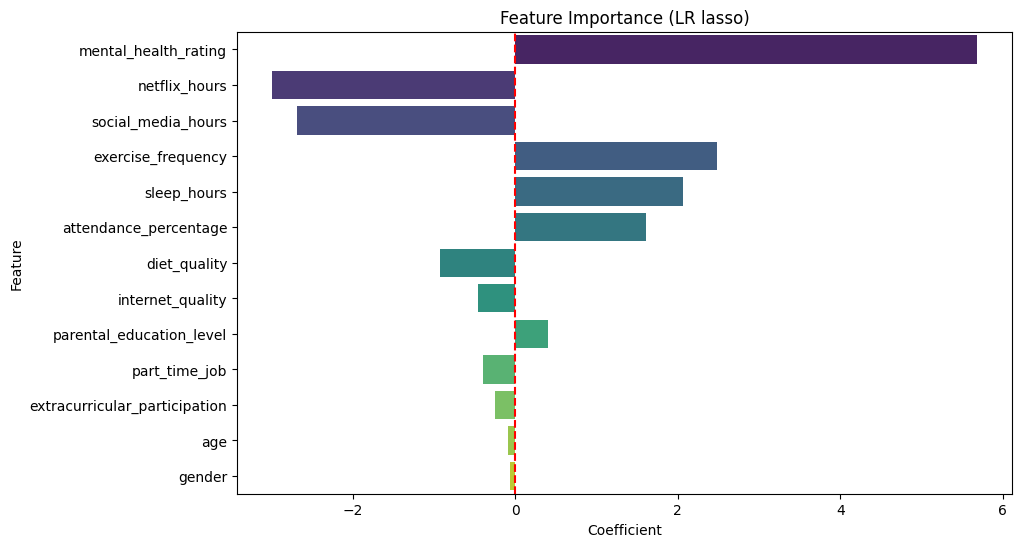

In [305]:
importance = pd.DataFrame({
    'Feature': X_train_linear.columns,
    'Coefficient': lr_lasso.coef_
}).sort_values(by='Coefficient', key=abs, ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(
    x='Coefficient',
    y='Feature',
    data=importance,
    palette='viridis'
)
plt.axvline(0, color='red', linestyle='--')
plt.title('Feature Importance (LR lasso)')
plt.show()

### 5.6 Linear Regression (ElasticNet)


C:\Users\5417011\AppData\Local\Temp\ipykernel_7284\319265374.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


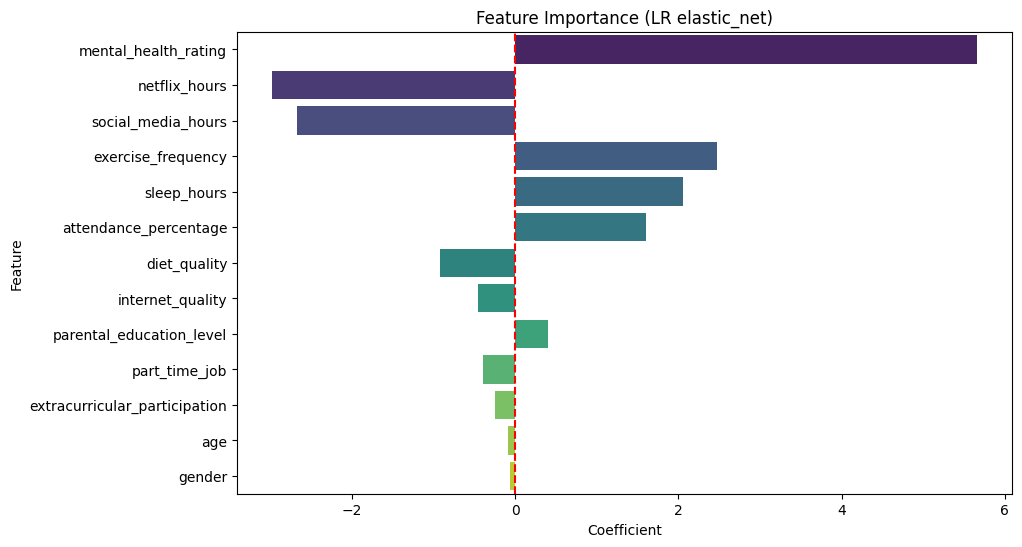

In [306]:
importance = pd.DataFrame({
    'Feature': X_train_linear.columns,
    'Coefficient': lr_enet.coef_
}).sort_values(by='Coefficient', key=abs, ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(
    x='Coefficient',
    y='Feature',
    data=importance,
    palette='viridis'
)
plt.axvline(0, color='red', linestyle='--')
plt.title('Feature Importance (LR elastic_net)')
plt.show()

### 5.7 Random Forest


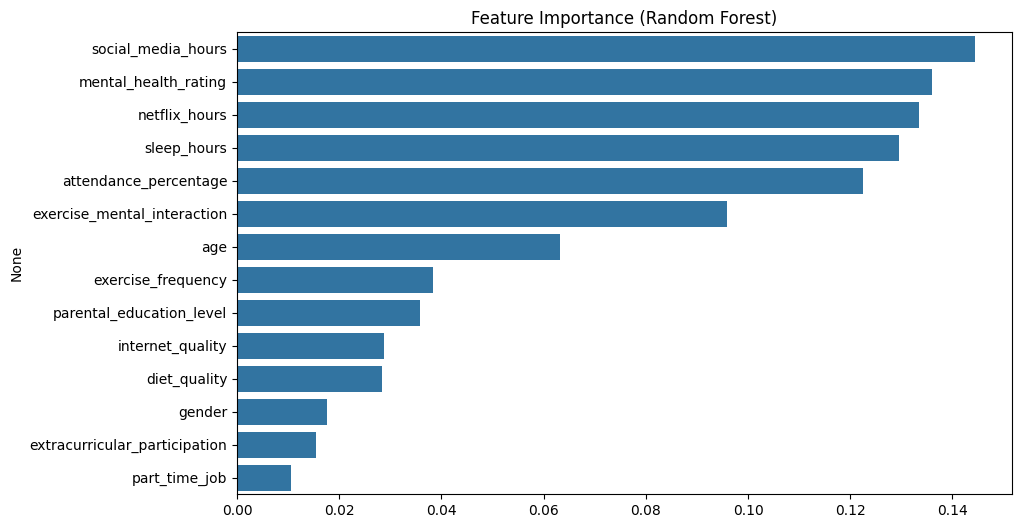

In [307]:
feature_importances = pd.Series(rf.feature_importances_, index=X_forest.columns)
feature_importances = feature_importances.sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=feature_importances.values, y=feature_importances.index)
plt.title("Feature Importance (Random Forest)")
plt.show()

### 5.6 XGBoost

<Figure size 1000x600 with 0 Axes>

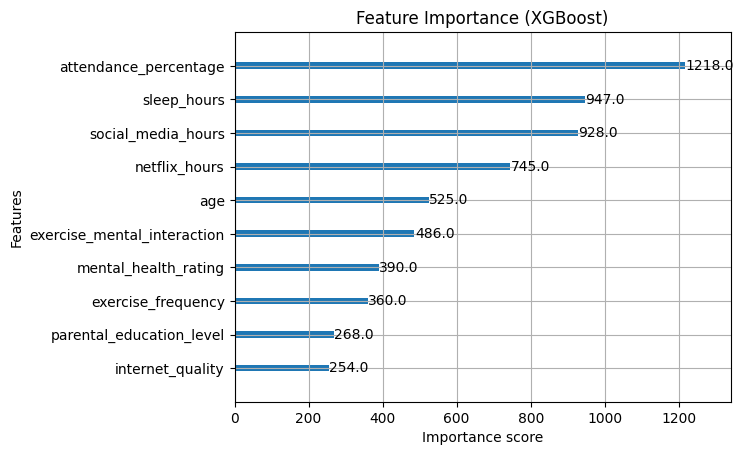

In [308]:
plt.figure(figsize=(10,6))
xgboost.plot_importance(xgb, importance_type='weight', max_num_features=10)
plt.title("Feature Importance (XGBoost)")
plt.show()

## 8. Написание своих реализаций (классы)

Напишите свои классы реализации:

- LR
- LR + GD
- LR + SGD
- *Random Forest (не обязательно)
- *Gradient Boosting Regressor (не обязательно)

In [309]:
import numpy as np


class AnalyticalLinearRegression:
    """
    Линейная регрессия, решаемая аналитически с помощью нормального уравнения:
    theta = (X^T X)^(-1) X^T y
    """
    def __init__(self):
        self.theta = None

    def fit(self, X, y):
        # Добавляем единичный столбец для свободного члена
        X_augmented = np.c_[np.ones(X.shape[0]), X]

        try:
            # Пытаемся вычислить параметры через обычную матрицу обратного
            self.theta = np.linalg.inv(X_augmented.T @ X_augmented) @ X_augmented.T @ y
        except np.linalg.LinAlgError:
            # Если матрица необратима — используем псевдообратную
            self.theta = np.linalg.pinv(X_augmented.T @ X_augmented) @ X_augmented.T @ y

    def predict(self, X):
        # Добавляем столбец единиц и предсказываем значения
        X_augmented = np.c_[np.ones(X.shape[0]), X]
        return X_augmented @ self.theta


In [310]:
import numpy as np


class GradientDescentLinearRegression:
    """
    Линейная регрессия, основанная на методе градиентного спуска.
    """
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.theta = None

    def fit(self, X, y):
        m = X.shape[0]
        # Добавляем столбец единиц для свободного члена (bias)
        X_augmented = np.c_[np.ones(m), X]
        n_params = X_augmented.shape[1]

        # Инициализация весов нулями
        self.theta = np.zeros(n_params)

        # Цикл обновления параметров модели
        for _ in range(self.n_iterations):
            predictions = X_augmented @ self.theta
            errors = predictions - y
            gradients = (2 / m) * X_augmented.T @ errors

            # Шаг оптимизации
            self.theta -= self.learning_rate * gradients

    def predict(self, X):
        # Добавляем bias-столбец и вычисляем прогноз
        X_augmented = np.c_[np.ones(X.shape[0]), X]
        return X_augmented @ self.theta


In [311]:
import numpy as np


class StochasticGradientDescentLinearRegression:
    """
    Линейная регрессия, обучаемая с помощью стохастического градиентного спуска.
    Параметры обновляются на основе одного или небольшого числа случайно выбранных примеров.
    """
    def __init__(self, learning_rate=0.01, n_epochs=1000, batch_size=1, verbose=False):
        self.learning_rate = learning_rate
        self.n_epochs = n_epochs
        self.batch_size = batch_size
        self.verbose = verbose
        self.theta = None

    def fit(self, X, y):
        m = X.shape[0]
        # Добавляем bias-столбец
        X_augmented = np.c_[np.ones(m), X]
        n_params = X_augmented.shape[1]

        # Инициализация весов
        self.theta = np.zeros(n_params)

        for epoch in range(self.n_epochs):
            # Перемешиваем данные
            indices = np.random.permutation(m)
            X_shuffled = X_augmented[indices]
            y_shuffled = y[indices]

            # Мини-пакетное обучение
            for i in range(0, m, self.batch_size):
                X_batch = X_shuffled[i:i+self.batch_size]
                y_batch = y_shuffled[i:i+self.batch_size]

                predictions = X_batch @ self.theta
                errors = predictions - y_batch
                gradients = (2 / len(y_batch)) * X_batch.T @ errors

                # Обновляем веса
                self.theta -= self.learning_rate * gradients

            # Логирование ошибки для отладки
            if self.verbose and epoch % 100 == 0:
                full_predictions = X_augmented @ self.theta
                loss = np.mean((full_predictions - y) ** 2)
                print(f"Epoch {epoch}, Loss: {loss}")

    def predict(self, X):
        X_augmented = np.c_[np.ones(X.shape[0]), X]
        return X_augmented @ self.theta


In [312]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Отделяем целевую переменную и признаки
X = df_linear.drop('exam_score', axis=1)
y = df_linear['exam_score']

# Делим данные на обучающую и тестовую выборки (80% / 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Масштабируем признаки для стабильной работы алгоритмов
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Обучаем модель аналитическим решением
lr_analytical = AnalyticalLinearRegression()
lr_analytical.fit(X_train_scaled, y_train.values)
y_pred_analytical = lr_analytical.predict(X_test_scaled)

# Обучаем модель с использованием градиентного спуска
lr_gd = GradientDescentLinearRegression(0.01, 1000)
lr_gd.fit(X_train_scaled, y_train.values)
y_pred_gd = lr_gd.predict(X_test_scaled)

# Обучаем модель со стохастическим градиентным спуском (батчи по 32)
lr_sgd = StochasticGradientDescentLinearRegression(0.001, n_epochs=500, batch_size=32, verbose=True)
lr_sgd.fit(X_train_scaled, y_train.values)
y_pred_sgd = lr_sgd.predict(X_test_scaled)

# Функция оценки качества модели
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"\n{model_name}:")
    print(f"  MSE: {mse:.2f}")
    print(f"  RMSE: {rmse:.2f}")
    print(f"  MAE: {mae:.2f}")
    print(f"  R²: {r2:.4f}")

# Оцениваем все три модели
evaluate_model(y_test, y_pred_analytical, "Analytical LR")
evaluate_model(y_test, y_pred_gd, "Gradient Descent LR")
evaluate_model(y_test, y_pred_sgd, "Stochastic Gradient Descent LR")


Epoch 0, Loss: 4696.888587990753
Epoch 100, Loss: 226.23712465623547
Epoch 200, Loss: 226.0348865074203
Epoch 300, Loss: 226.03486528821833
Epoch 400, Loss: 226.03486390323852

Analytical LR:
  MSE: 218.12
  RMSE: 14.77
  MAE: 11.49
  R²: 0.1494

Gradient Descent LR:
  MSE: 218.12
  RMSE: 14.77
  MAE: 11.49
  R²: 0.1494

Stochastic Gradient Descent LR:
  MSE: 218.12
  RMSE: 14.77
  MAE: 11.49
  R²: 0.1494


## 9. Итоги

Что сделать?

1. Сгрупировать все метрики, и выяснить, какой методо сработал лучше всего и почему?
2. Ответить на вопросы:

    1. Что такое регрессия и чем она отличается от классификации?
    2. Какова целевая переменная в задаче регрессии?
    3. Зачем нужно масштабирование признаков перед обучением линейной регрессии?
    4. Что означает коэффициент признака в линейной регрессии?
    5. Что такое MSE, RMSE, MAE и R², и чем они отличаются?
    6. В чем разница между Ridge и Lasso регуляризацией?
    7. Почему деревья решений и Random Forest не требуют стандартизации признаков?
    8. Что такое мультиколлинеарность и почему она мешает линейной регрессии?
    9. Как можно уменьшить влияние выбросов на линейную регрессию?
    10. Какие гиперпараметры наиболее важны для Random Forest Regressor?
    11. Какие гиперпараметры наиболее важны для XGBoost в задаче регрессии?
    12. Что значит глубина дерева (max\_depth) и как она влияет на модель?
    13. Зачем нужен `learning_rate` в градиентном бустинге?
    14. Как можно оценить важность признаков (feature importance) в линейной регрессии, случайном лесу и XGBoost?
    15. Почему XGBoost часто работает лучше, чем Random Forest, на структурированных данных?
    16. Что такое переобучение и как его можно выявить на графике обучения?
    17. Как работает метод ансамблирования в Random Forest (bagging)?
    18. В чем отличие бустинга от бэггинга?
    19. Какие способы feature engineering можно применить к винному датасету (Wine Quality)?
    20. Как использовать кросс-валидацию для подбора гиперпараметров моделей регрессии?


#### 9.1. Группировка метрик

In [313]:
# code here
results = [
    {'Model': 'LinearRegression', 'MSE': 31.04, 'RMSE': 5.57, 'MAE': 4.46, 'R2': 0.892},
    {'Model': 'SGDRegressor', 'MSE': 30.91, 'RMSE': 5.56, 'MAE': 4.46, 'R2': 0.893},
    {'Model': 'Ridge', 'MSE': 31.02, 'RMSE': 5.57, 'MAE': 4.46, 'R2': 0.892},
    {'Model': 'Lasso', 'MSE': 31.02, 'RMSE': 5.57, 'MAE': 4.46, 'R2': 0.892},
    {'Model': 'ElasticNet', 'MSE': 30.94, 'RMSE': 5.56, 'MAE': 4.46, 'R2': 0.892},
    {'Model': 'RandomForestRegressor', 'MSE': 36.66, 'RMSE': 6.05, 'MAE': 4.79, 'R2': 0.873},
    {'Model': 'XGBRegressor', 'MSE': 32.22, 'RMSE': 5.68, 'MAE': 4.52, 'R2': 0.888},
]

# Группируем в DataFrame
metrics_df = pd.DataFrame(results)

# Выводим все в порядке возрастания MSE (или по любой другой метрике)
metrics_sorted = metrics_df.sort_values(by='MSE')
print(metrics_sorted)

# Также можно найти модель с наименьшей ошибкой и максимальным R2
best_model_mse = metrics_df.loc[metrics_df['MSE'].idxmin()]
best_model_r2 = metrics_df.loc[metrics_df['R2'].idxmax()]

print("Лучшая по MSE:", best_model_mse['Model'])
print("Лучшая по R2:", best_model_r2['Model'])

                   Model    MSE  RMSE   MAE     R2
1           SGDRegressor  30.91  5.56  4.46  0.893
4             ElasticNet  30.94  5.56  4.46  0.892
2                  Ridge  31.02  5.57  4.46  0.892
3                  Lasso  31.02  5.57  4.46  0.892
0       LinearRegression  31.04  5.57  4.46  0.892
6           XGBRegressor  32.22  5.68  4.52  0.888
5  RandomForestRegressor  36.66  6.05  4.79  0.873
Лучшая по MSE: SGDRegressor
Лучшая по R2: SGDRegressor


Самый точный результат показали линейные регрессии с регуляризацией (Ridge, Lasso, ElasticNet, SGD), а также SGDRegressor — их R² максимален, ошибки минимальны.

#### 9.2. Ответы на вопросы

# Основы машинного обучения: регрессия и классификация

## Что такое регрессия и чем она отличается от классификации?
**Регрессия** — задача предсказания численного значения (например, оценка или цена).  
**Классификация** — задача выбора категории или класса (например, «прошёл» / «не прошёл»).

***

## Целевая переменная в задаче регрессии
Целевая переменная — это *непрерывная числовая величина*, которую модель должна прогнозировать (например, `exam_score`).

***

## Масштабирование признаков в линейной регрессии
Масштабирование нужно, чтобы все признаки были одного порядка величин. Это:
- ускоряет обучение,
- повышает устойчивость,
- улучшает корректность коэффициентов.

***

## Коэффициент признака в линейной регрессии
Показывает, на сколько изменится целевая переменная при увеличении данного признака на 1, при прочих равных условиях.

***

## Метрики качества: MSE, RMSE, MAE и R²
- **MSE** — среднеквадратичная ошибка.
- **RMSE** — корень из MSE, имеет те же единицы, что и целевая переменная.
- **MAE** — средняя абсолютная ошибка.
- **R²** — доля объяснённой дисперсии, отражает качество модели.

***

## Различия между Ridge и Lasso регуляризацией
- **Ridge (L2)** — штрафует все коэффициенты, уменьшает их, но не зануляет.
- **Lasso (L1)** — может занулять коэффициенты, фактически отбирая признаки.

***

## Почему деревья решений и Random Forest не требуют стандартизации
Деревья разбивают данные по значениям признаков, а не по их масштабу или распределению, поэтому масштабирование не влияет.

***

## Мультиколлинеарность и её влияние на линейную регрессию
Мультиколлинеарность — высокая корреляция между признаками. Она вызывает нестабильность коэффициентов и затрудняет их интерпретацию.

***

## Уменьшение влияния выбросов в линейной регрессии
- Использовать робастные метрики (например, MAE или Huber).
- Обработать выбросы: удалить или скорректировать данные.

***

## Важные гиперпараметры для моделей
- **Random Forest Regressor:** `n_estimators`, `max_depth`, `max_features`, `min_samples_split`, `min_samples_leaf`.
- **XGBoost для регрессии:** `n_estimators`, `max_depth`, `learning_rate`, `subsample`, `colsample_bytree`, `gamma`.

***

## Глубина дерева (max_depth)
Определяет максимальную глубину дерева:
- Большая глубина — более сложная модель, возможное переобучение.
- Малая глубина — может привести к недообучению.

***

## Роль learning_rate в градиентном бустинге
Контролирует вклад каждого последующего дерева в итоговый ансамбль, помогая избежать переобучения.

***

## Оценка важности признаков (feature importance)
- В линейной регрессии — по абсолютным значениям коэффициентов.
- В деревьях (Random Forest, XGBoost) — по суммарному уменьшению ошибки (gain).

***

## Почему XGBoost часто лучше Random Forest на структурированных данных
Потому что XGBoost:
- Лучше оптимизирует ошибки,
- Включает регуляризацию,
- Учитывает сложные зависимости между признаками.

***

## Переобучение и его выявление
Переобучение — когда модель хорошо работает на обучающих данных, но плохо на тестовых.  
На графике обучения это видно как сильное расхождение между ошибками на train и test.

***

## Ансамблирование в Random Forest (bagging)
Строятся независимые деревья на случайных подвыборках данных; итоговый прогноз — усреднение всех деревьев.

***

## Отличие бустинга от бэггинга
- **Бэггинг:** параллельное построение независимых моделей.
- **Бустинг:** последовательное построение моделей, где каждая исправляет ошибки предыдущей.

***

## Способы feature engineering на датасете Wine Quality
- Создание полиномиальных признаков.
- Логарифмирование.
- Вычисление соотношений и взаимодействий признаков.
- Бинаризация категориальных переменных.

***

## Использование кросс-валидации для подбора гиперпараметров
Оценка разных конфигураций параметров на нескольких фолдах, выбор с лучшей средней метрикой.
